In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/rock_density_xray.csv')

In [3]:
df.columns = ['Signal', 'Density']

In [4]:
X = df.drop('Density', axis=1)
y = df['Density']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [6]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [9]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

In [10]:
signal_range = np.arange(1, 100)

In [13]:
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))

In [12]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print('RMSE: {}'.format(rmse))
    
    mae = mean_absolute_error(y_test, preds)
    print('MAE: {}'.format(mae))
    
    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))
    
    plt.figure(figsize=(12, 8), dpi=200)
    sns.scatterplot(x='Signal', y='Density', data=df, color='black')

    plt.plot(signal_range, signal_preds)

RMSE: 0.2570051996584629
MAE: 0.211198973318633


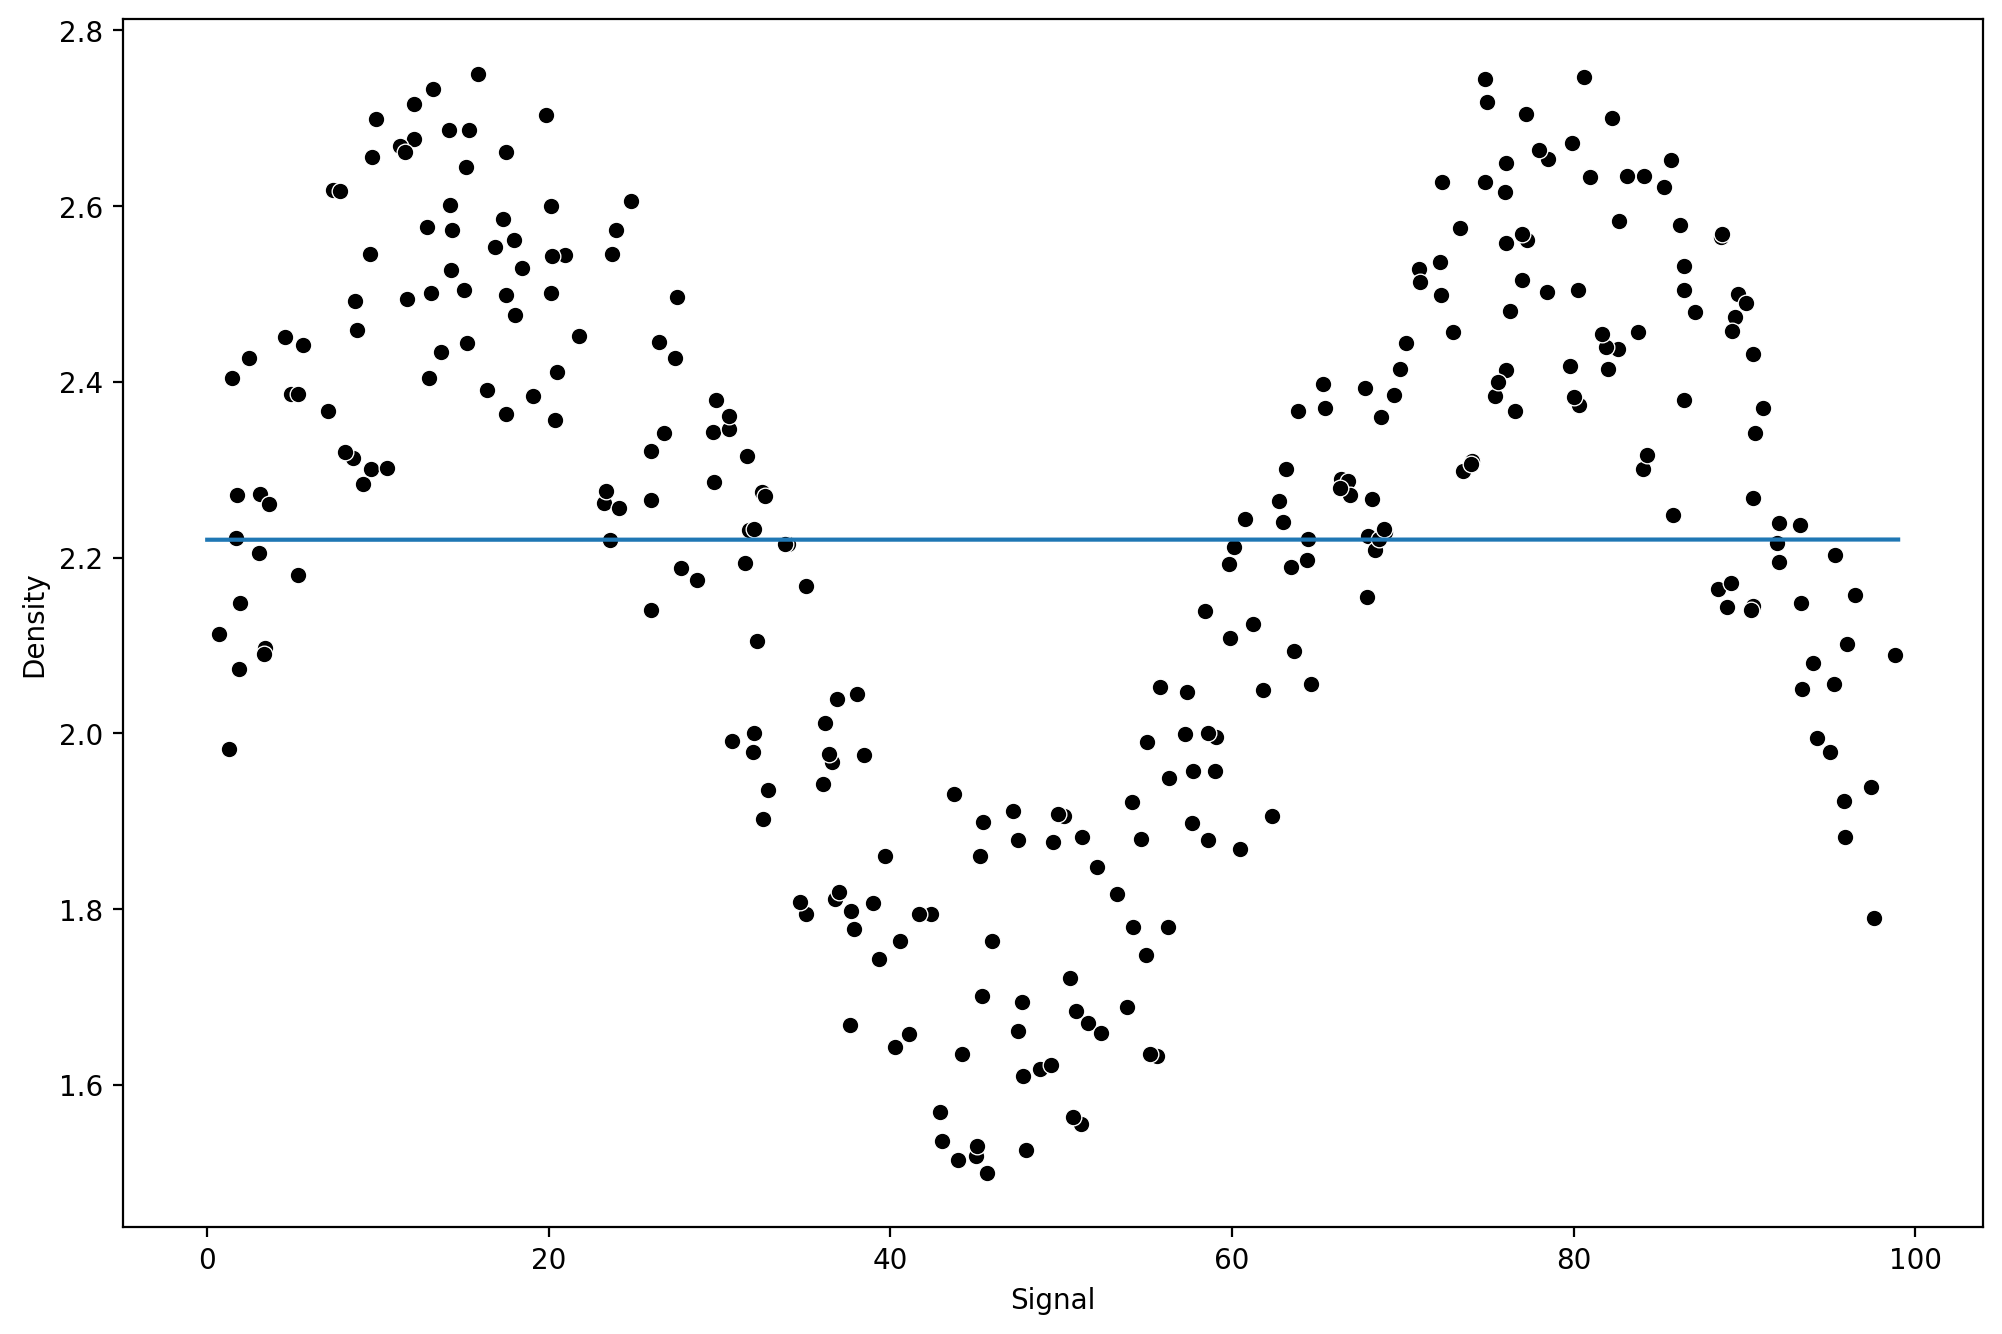

In [13]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [15]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

RMSE: 0.13807383449323551
MAE: 0.11969085253552043


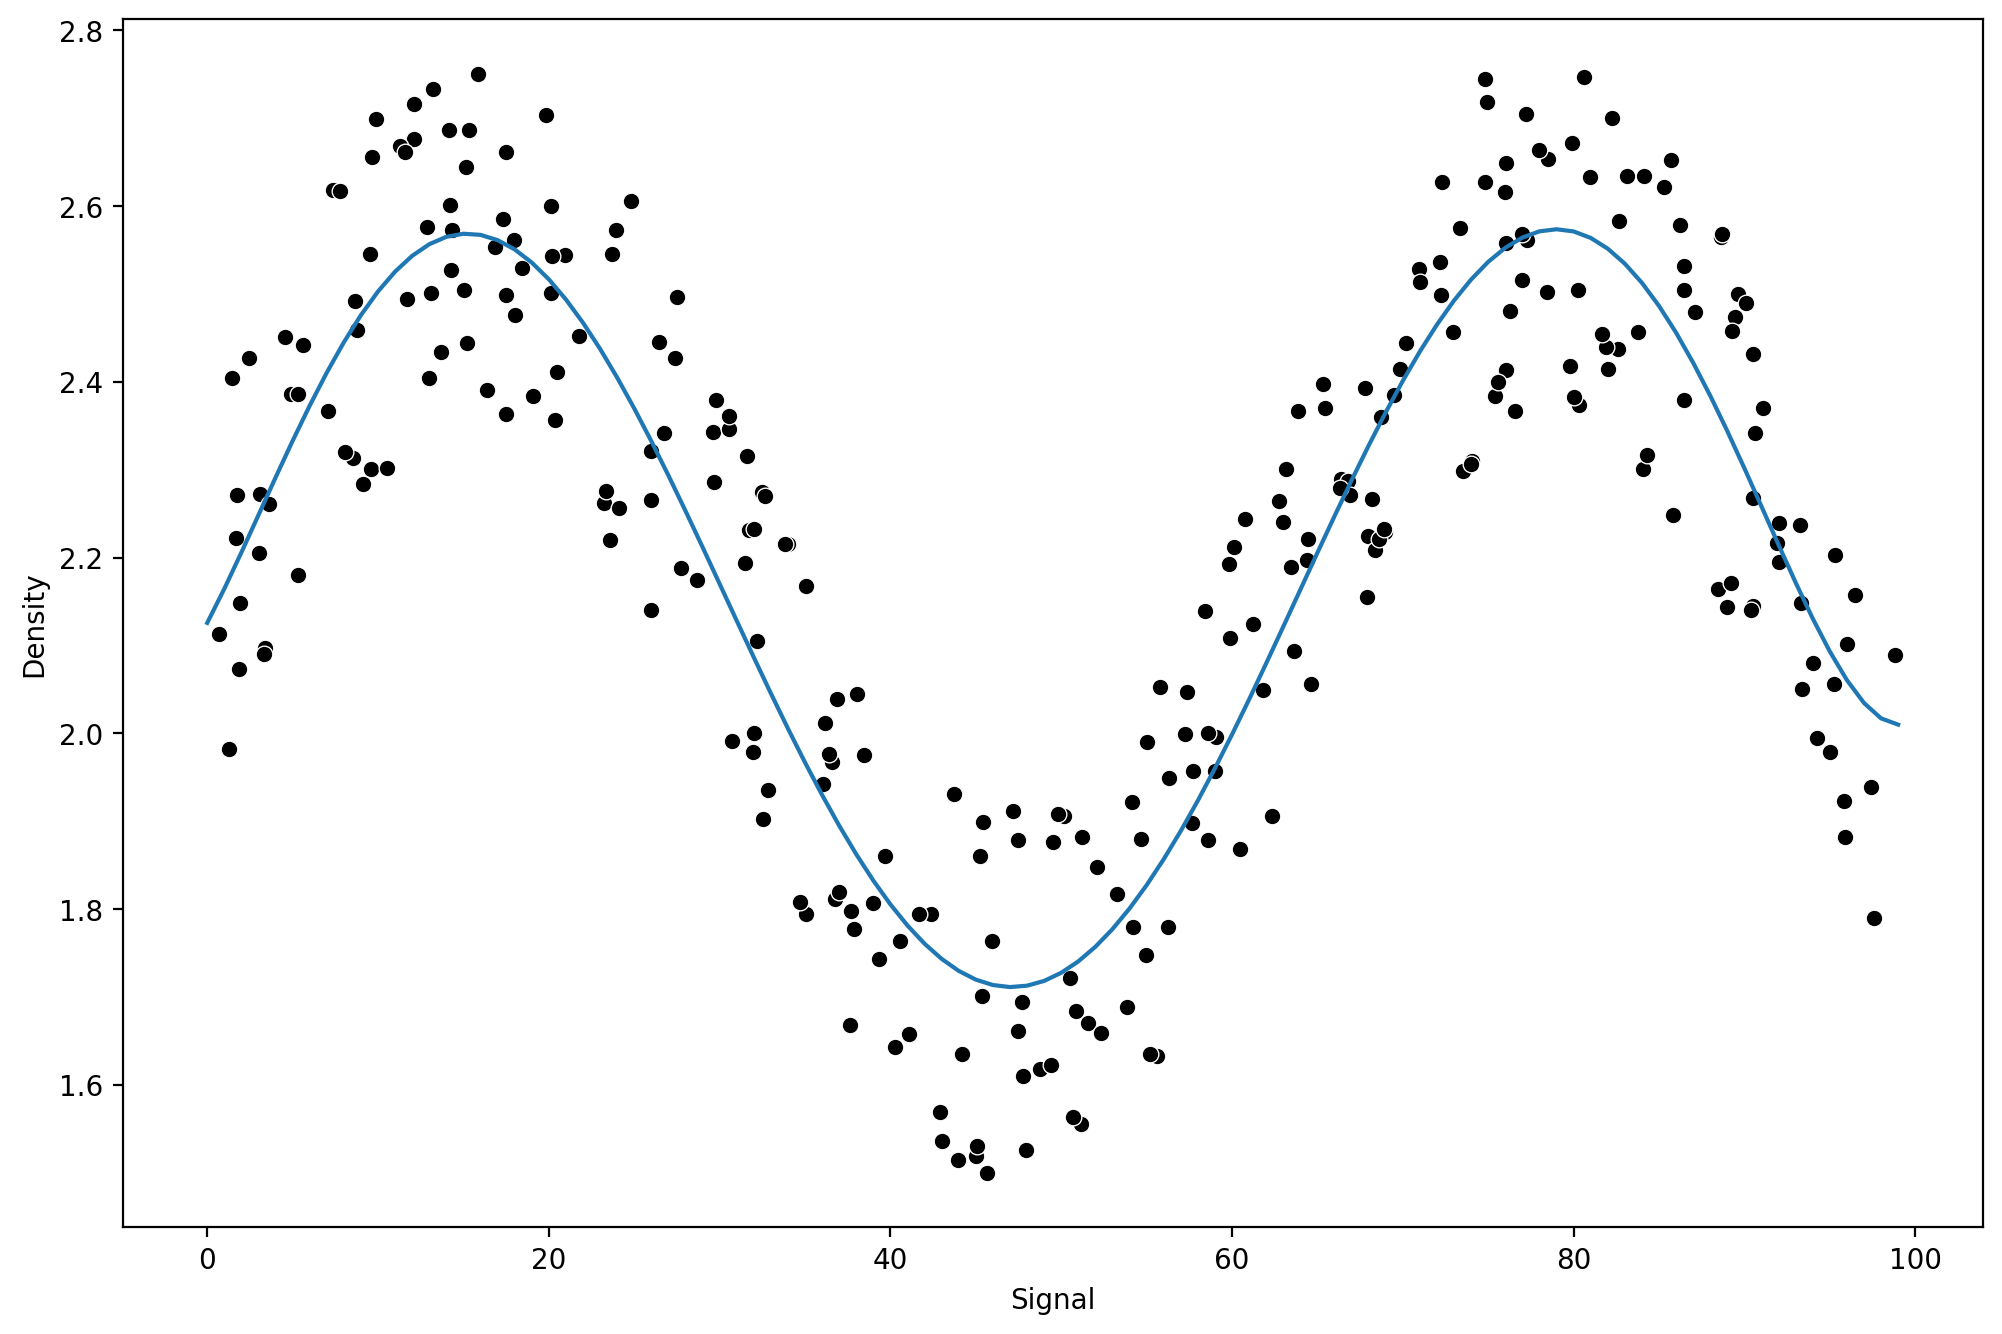

In [16]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [20]:
k_values = [1, 5, 10, 30]

RMSE: 0.1523487028635337
MAE: 0.11877297474442378
RMSE: 0.13730685016923647
MAE: 0.12198383614100558
RMSE: 0.13277855732740926
MAE: 0.11635971693292672
RMSE: 0.15954234753677107
MAE: 0.13363165935705318


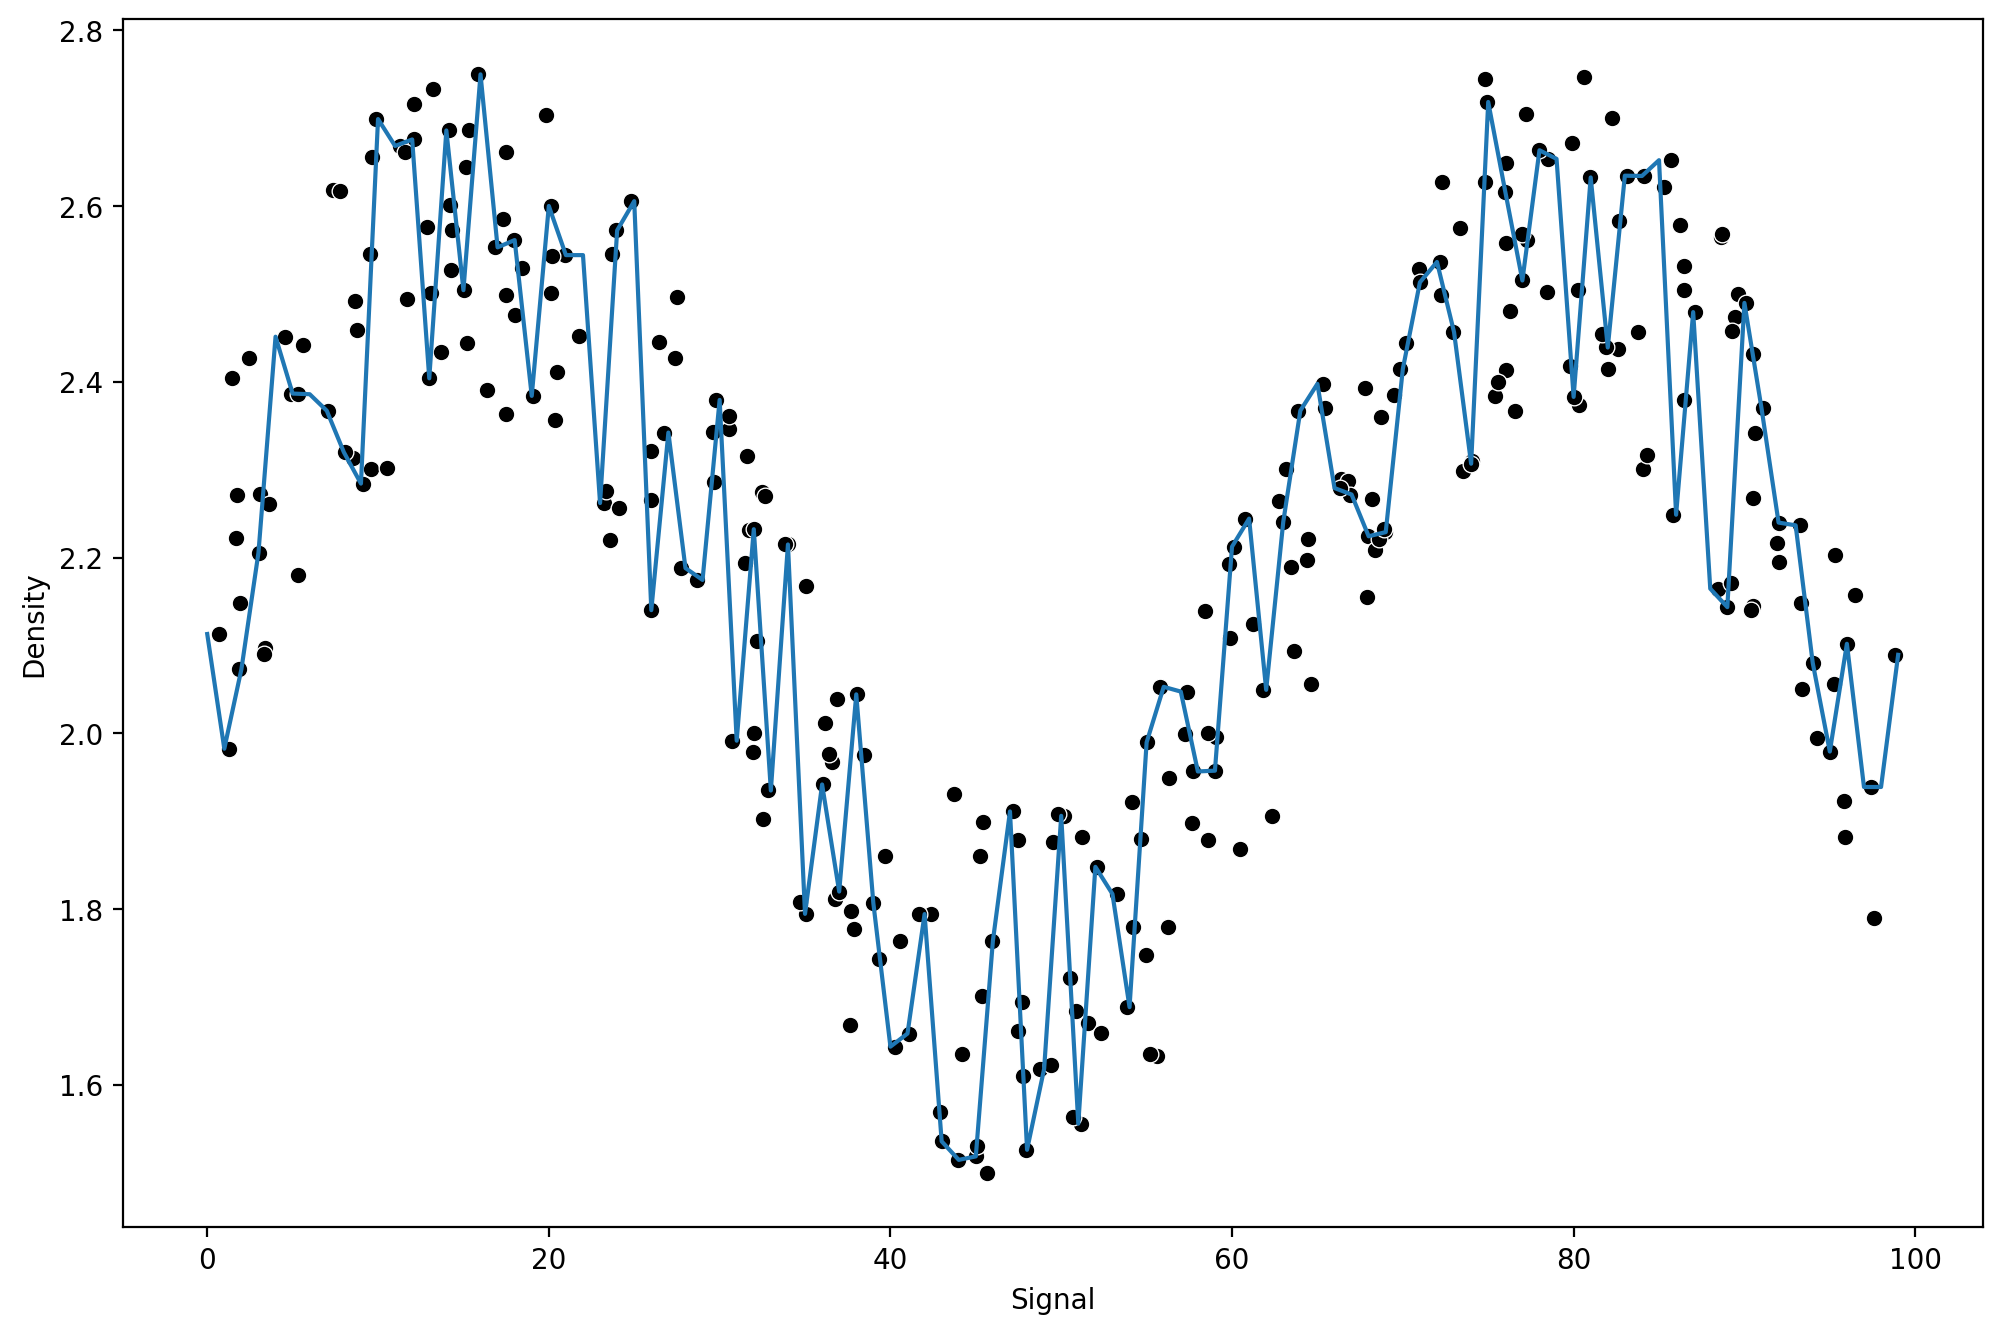

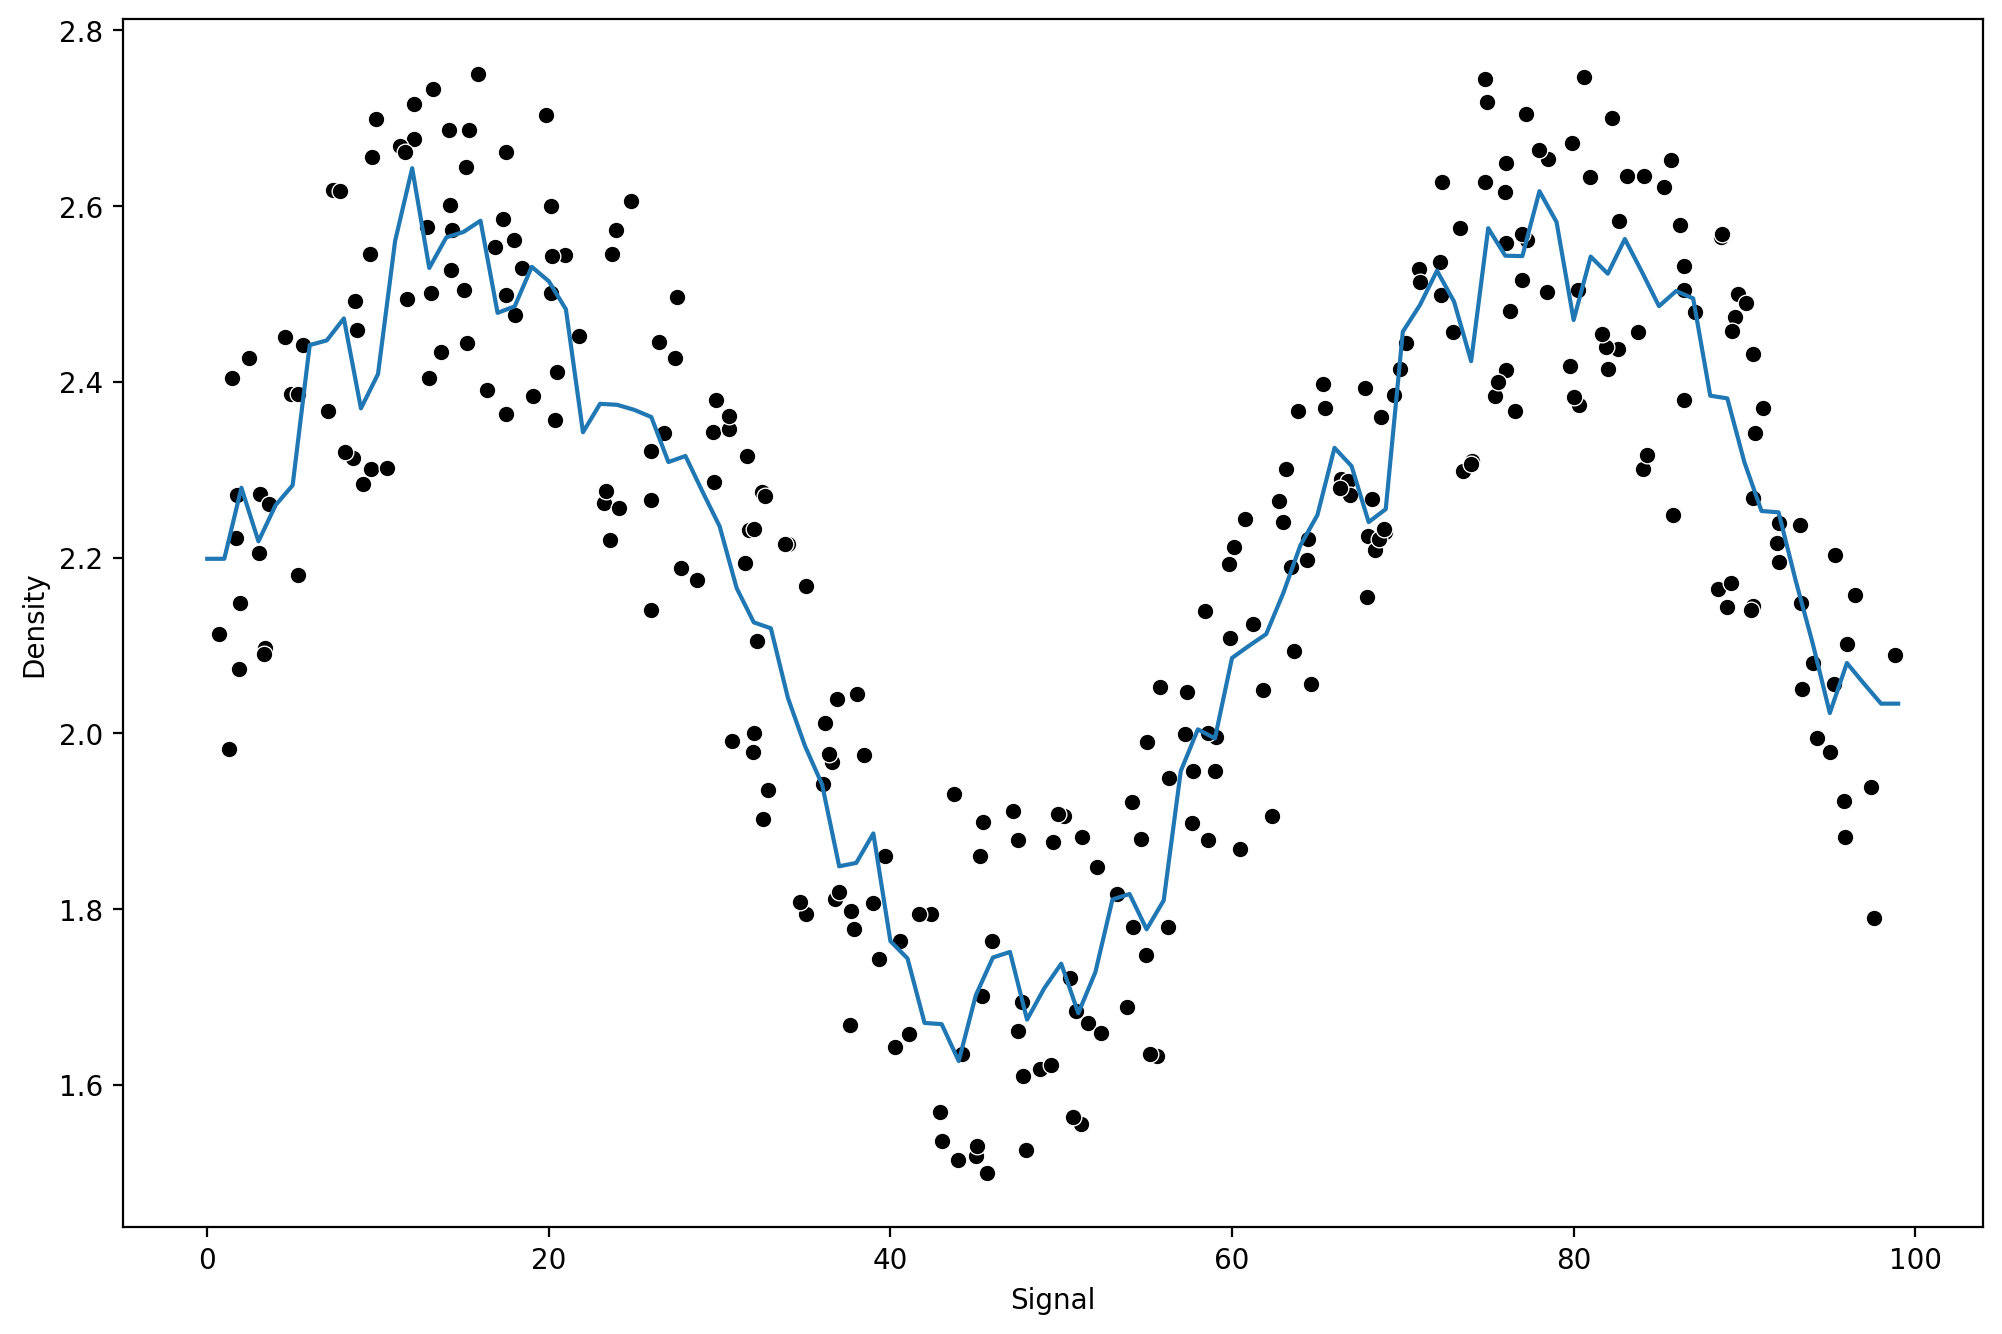

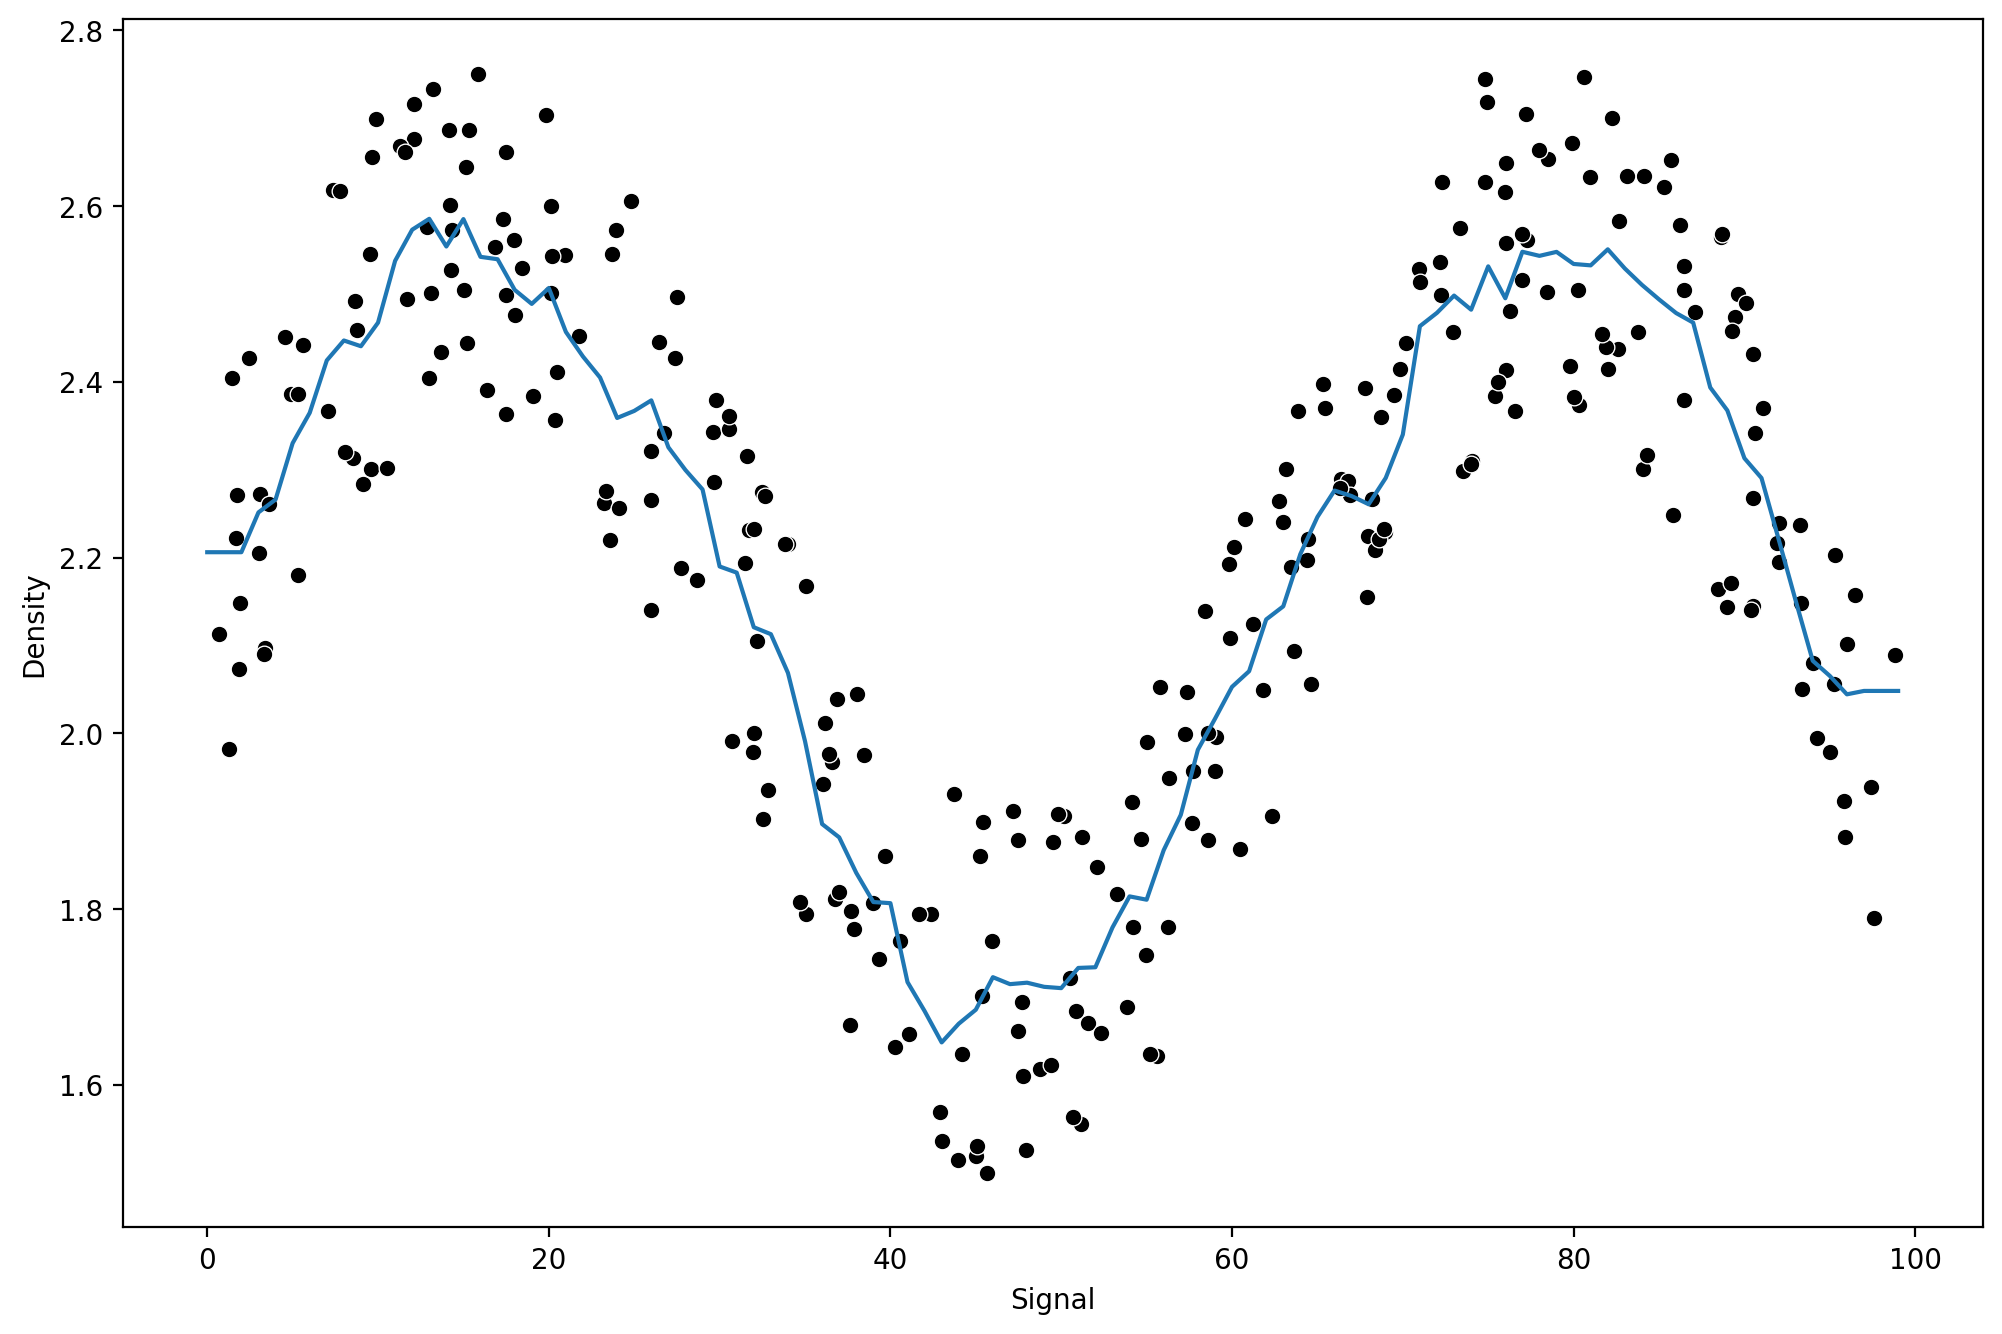

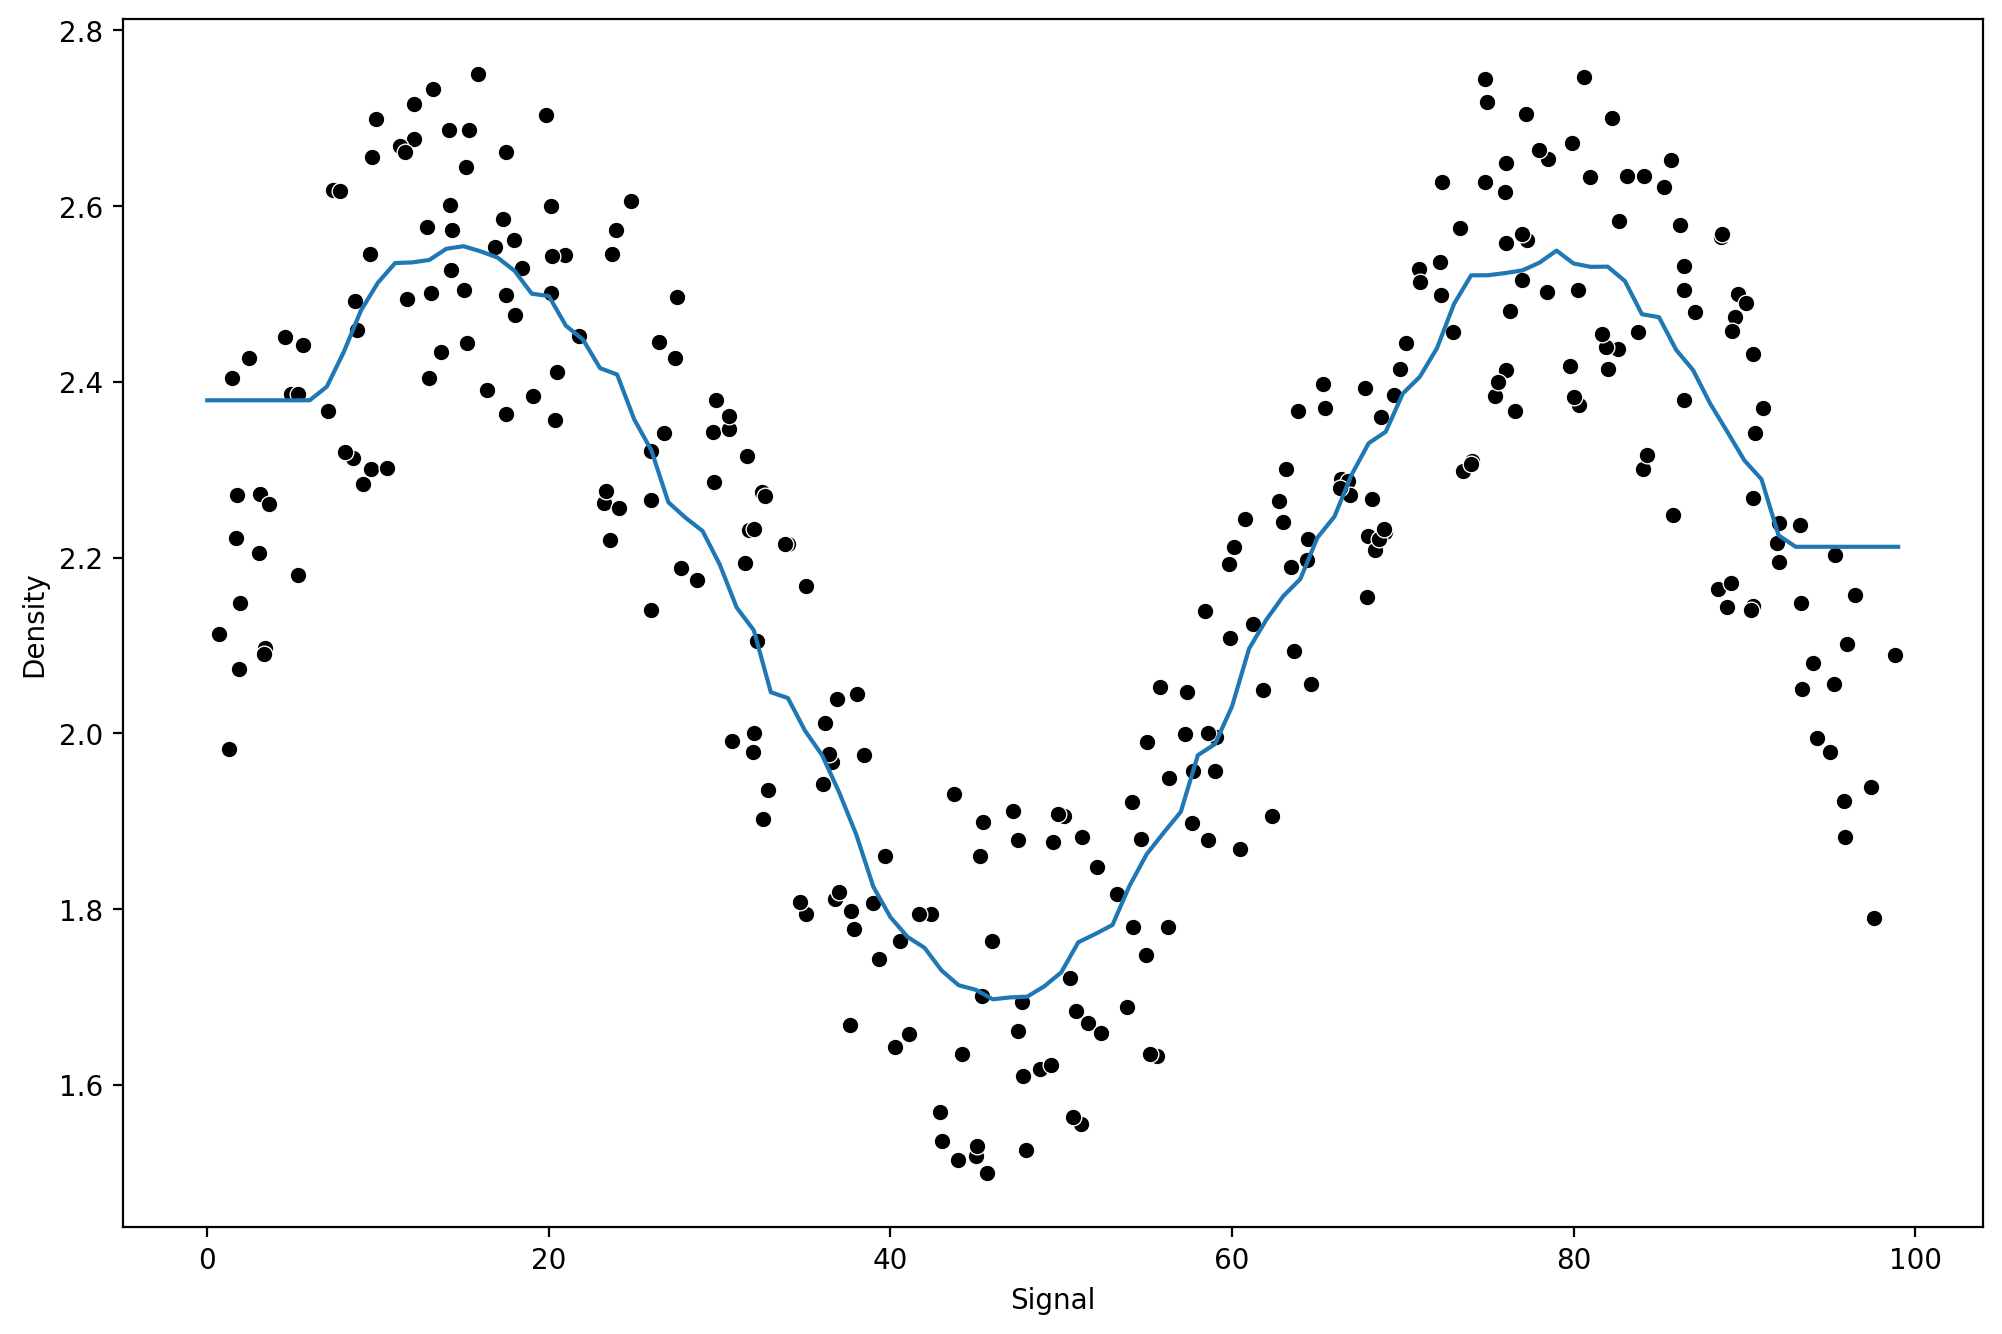

In [21]:
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

In [22]:
from sklearn.tree import DecisionTreeRegressor

RMSE: 0.1523487028635337
MAE: 0.11877297474442378


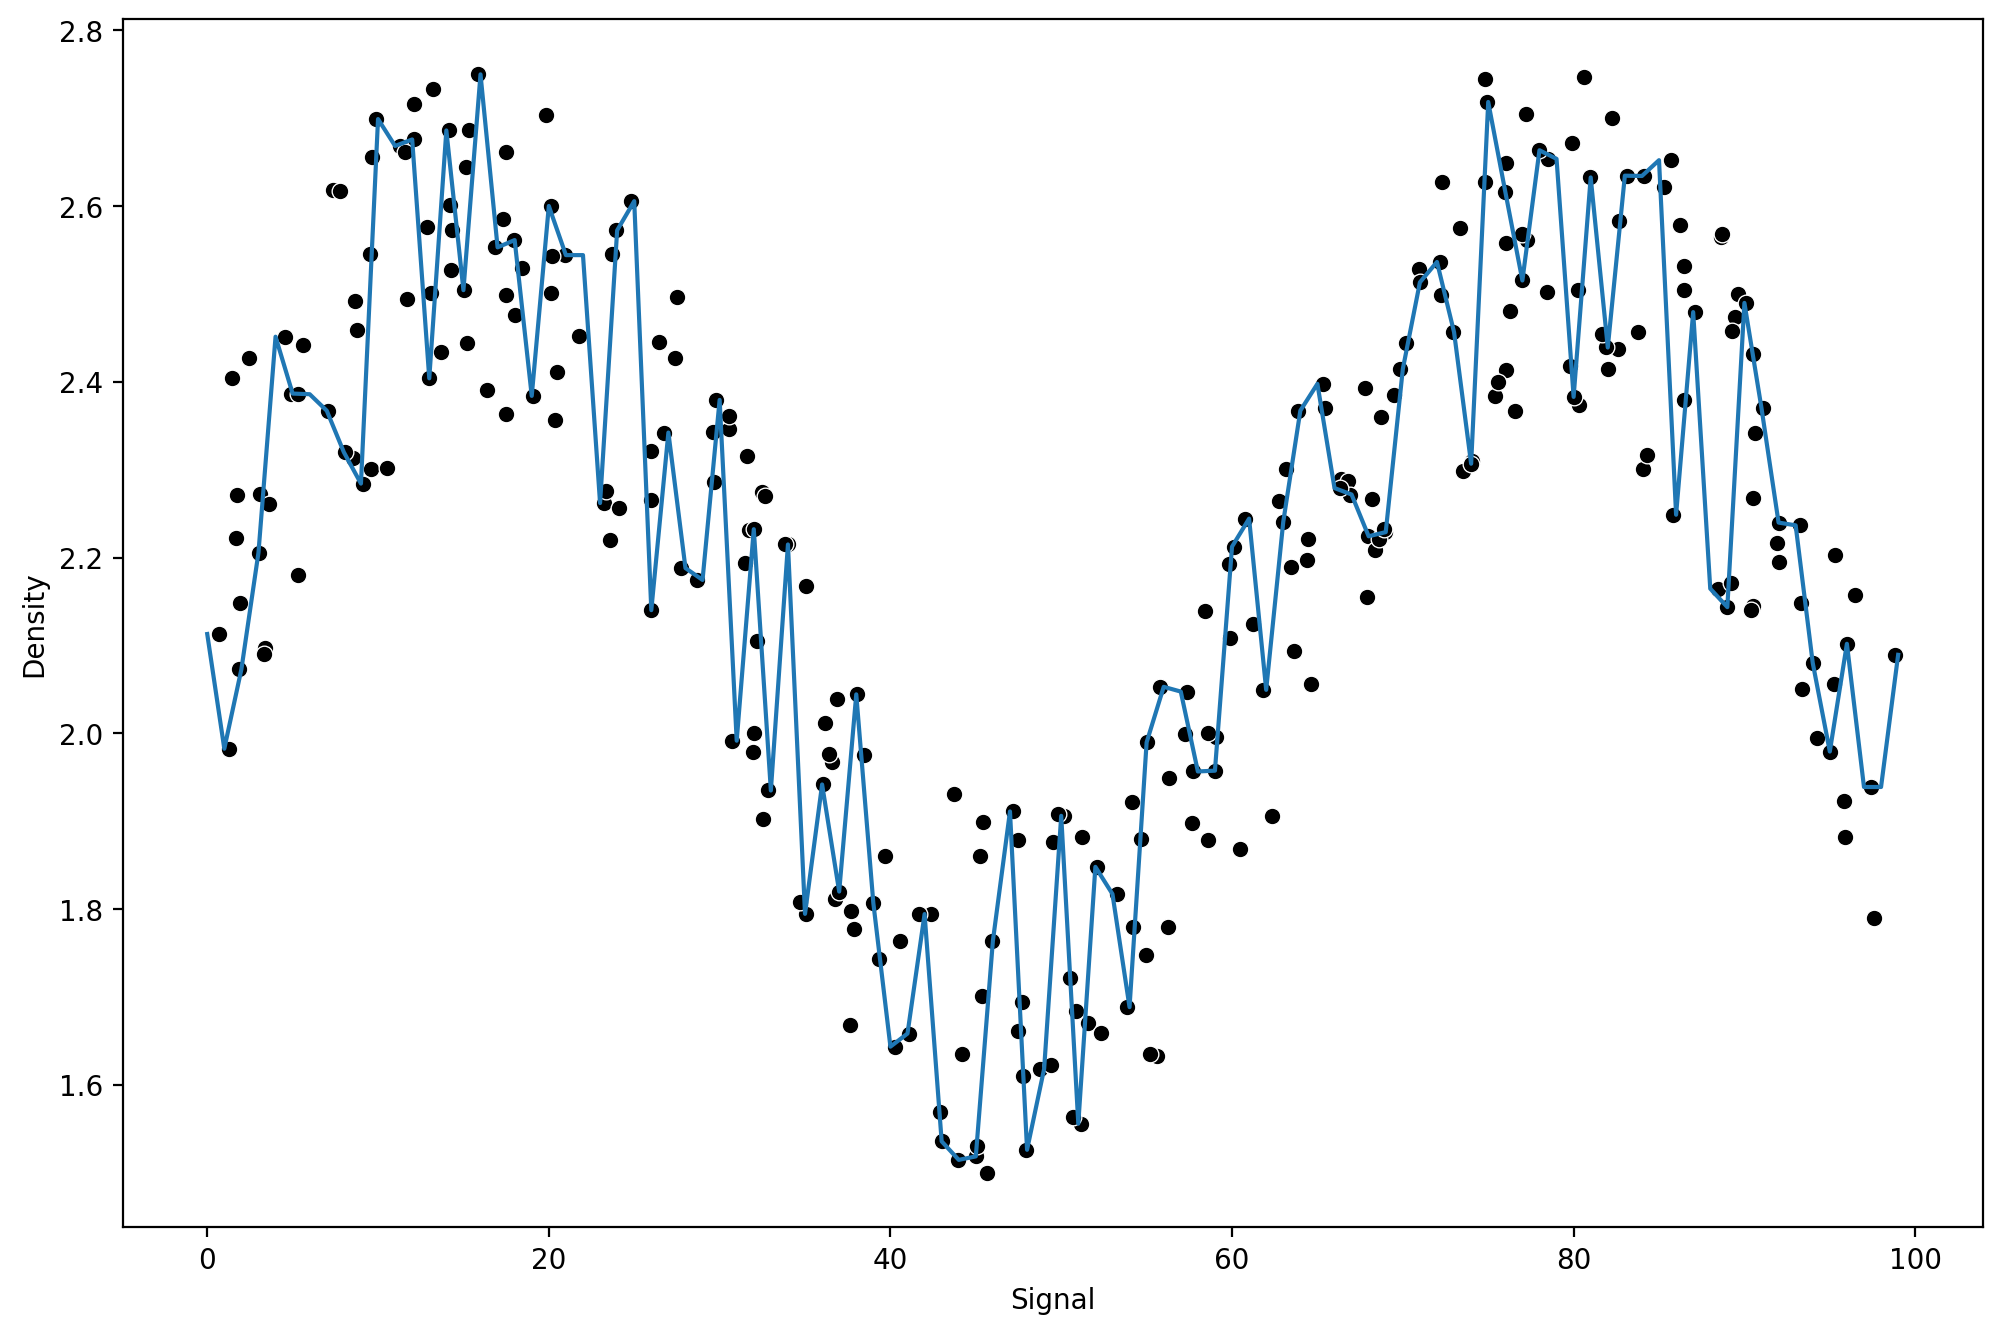

In [24]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [25]:
from sklearn.svm import SVR

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
svr = SVR()

param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
    'gamma': ['auto', 'scale']
}

grid = GridSearchCV(svr, param_grid)

RMSE: 0.12646999302047557
MAE: 0.10854210121349125


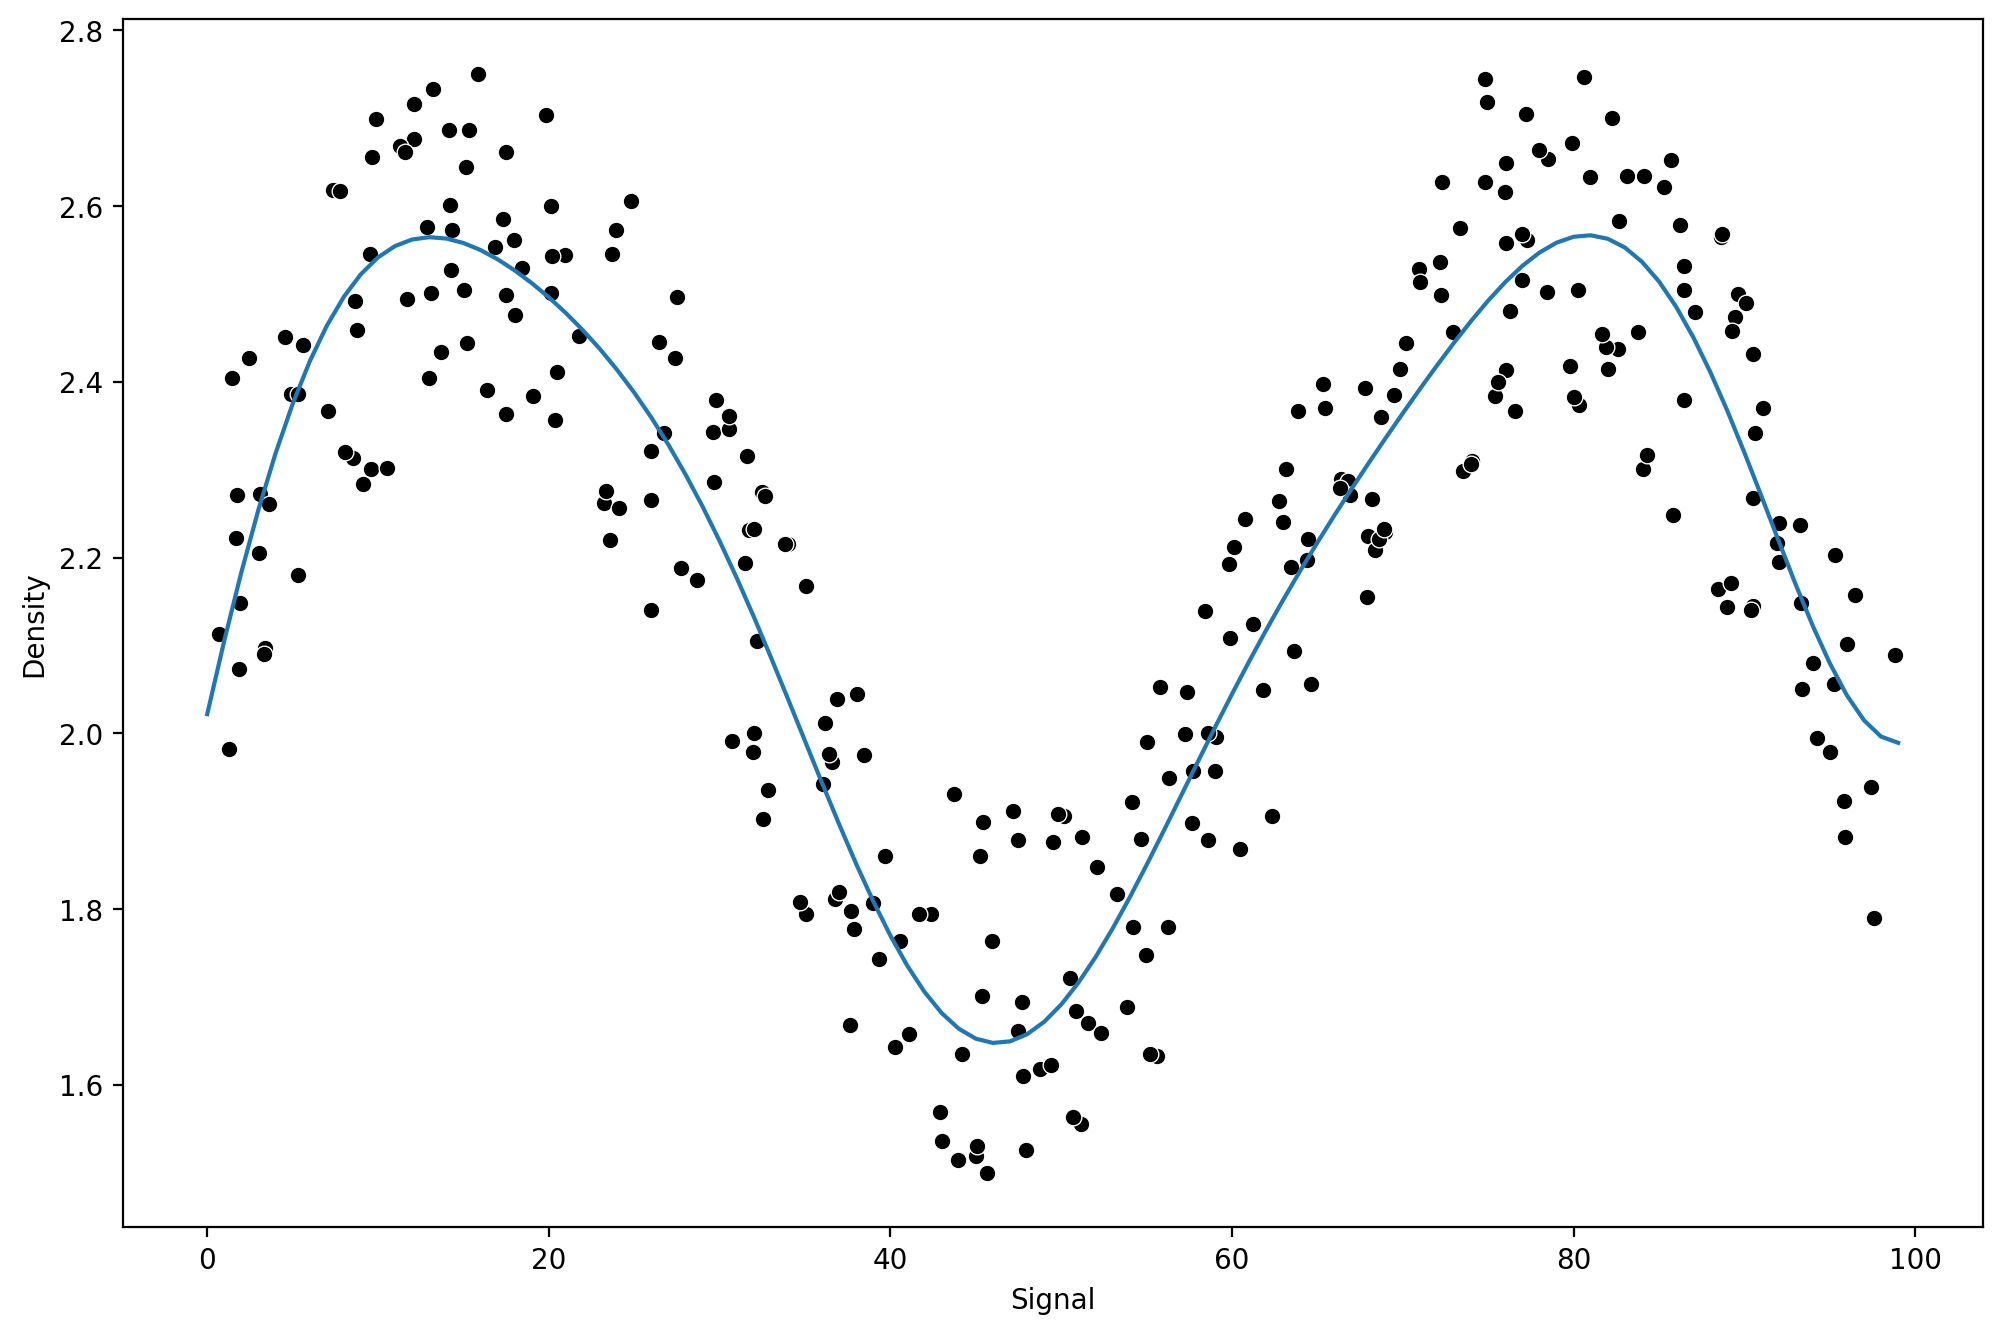

In [29]:
run_model(grid, X_train, y_train, X_test, y_test)

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rfr = RandomForestRegressor(n_estimators=10)

RMSE: 0.13417052332366985
MAE: 0.1115491702956129


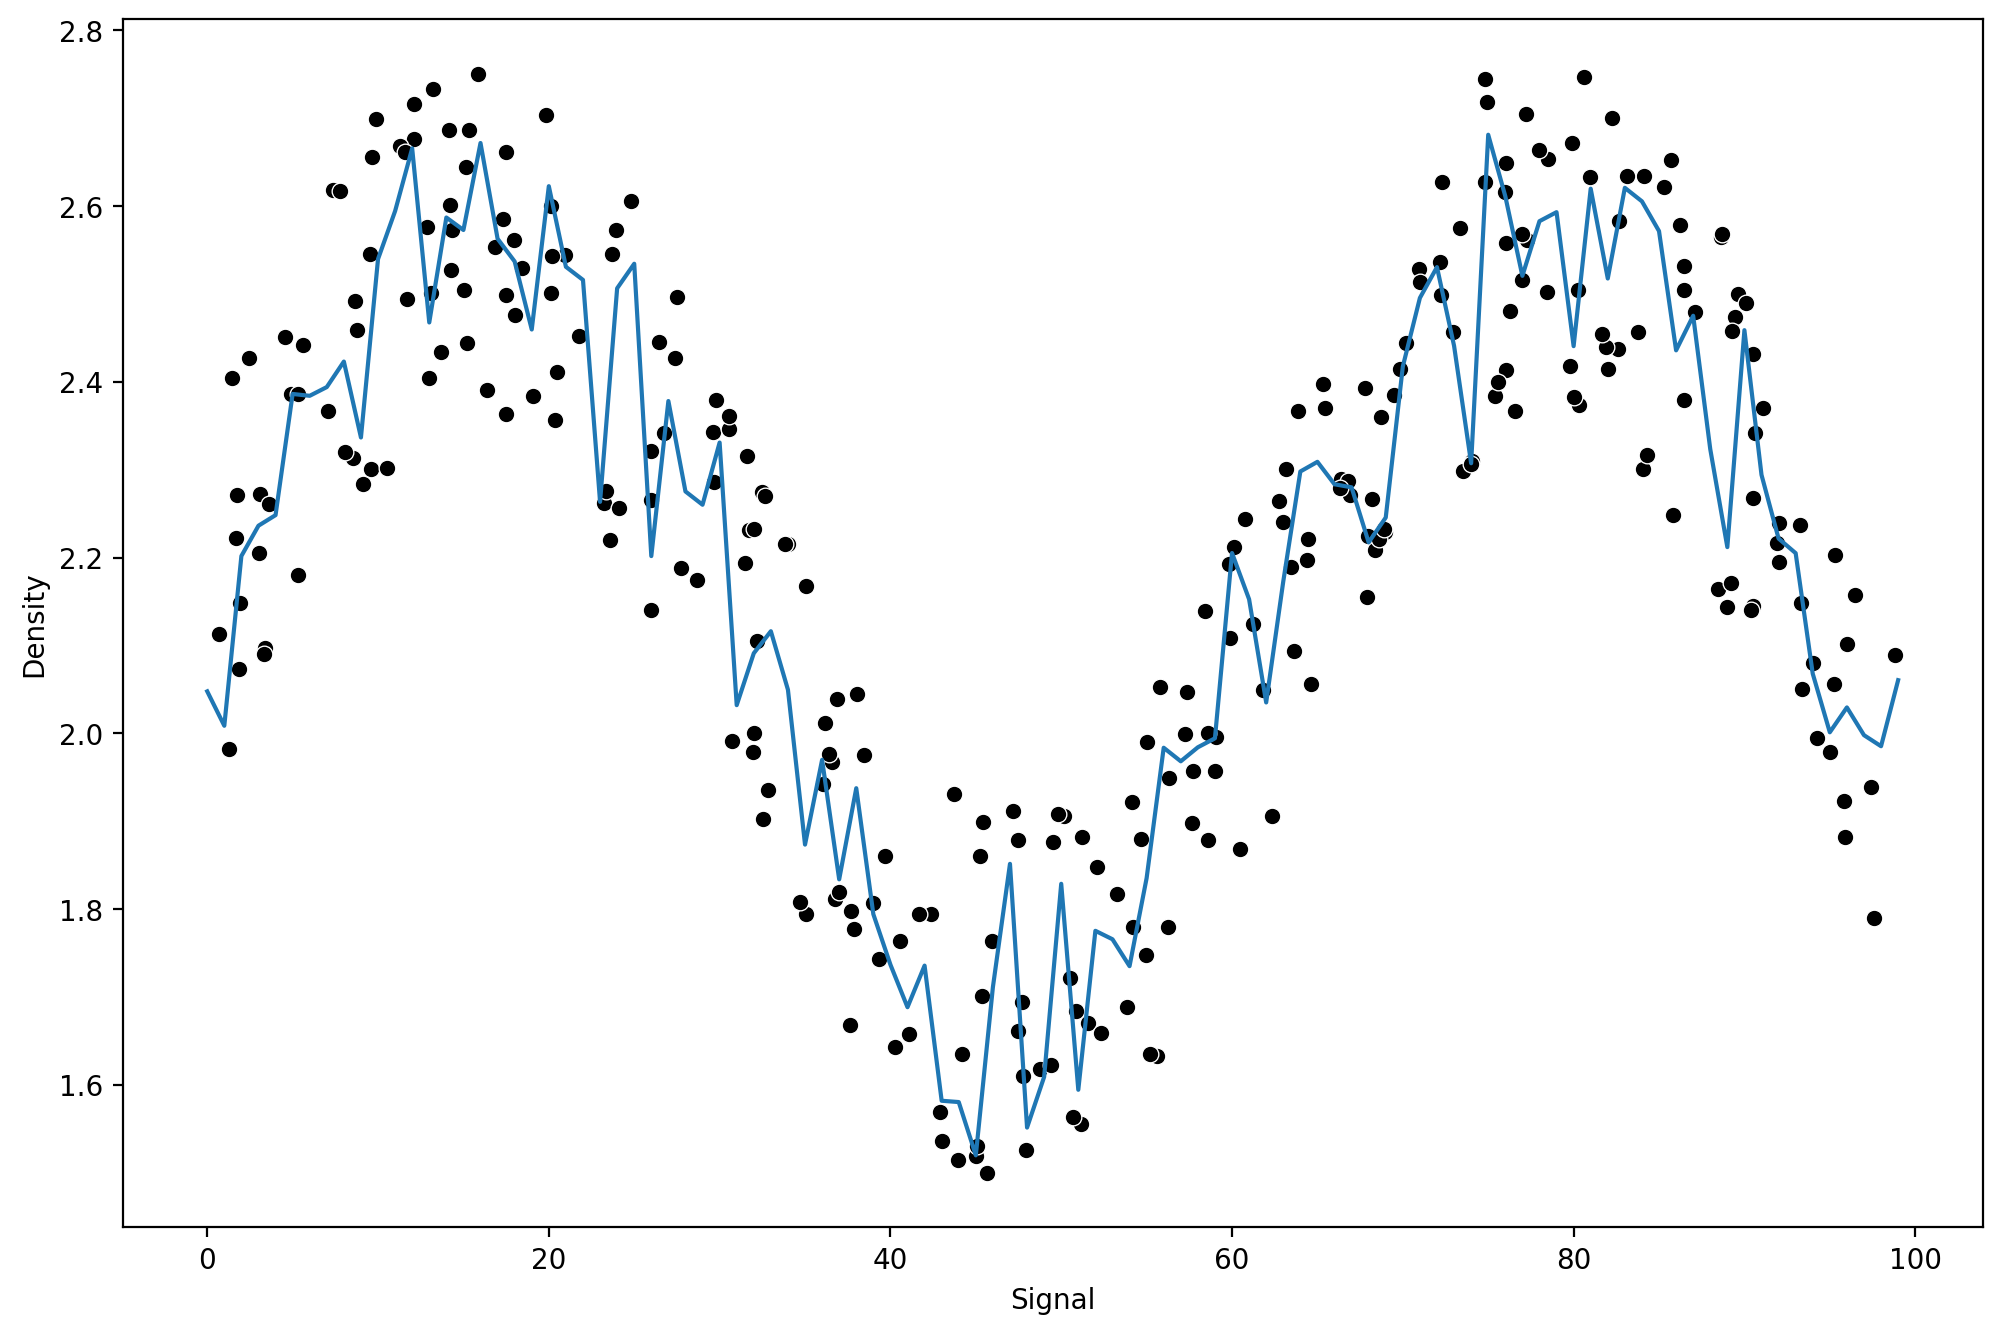

In [32]:
run_model(rfr, X_train, y_train, X_test, y_test)

In [33]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

In [34]:
model = GradientBoostingRegressor()

RMSE: 0.13294148649584667
MAE: 0.11318284854800689


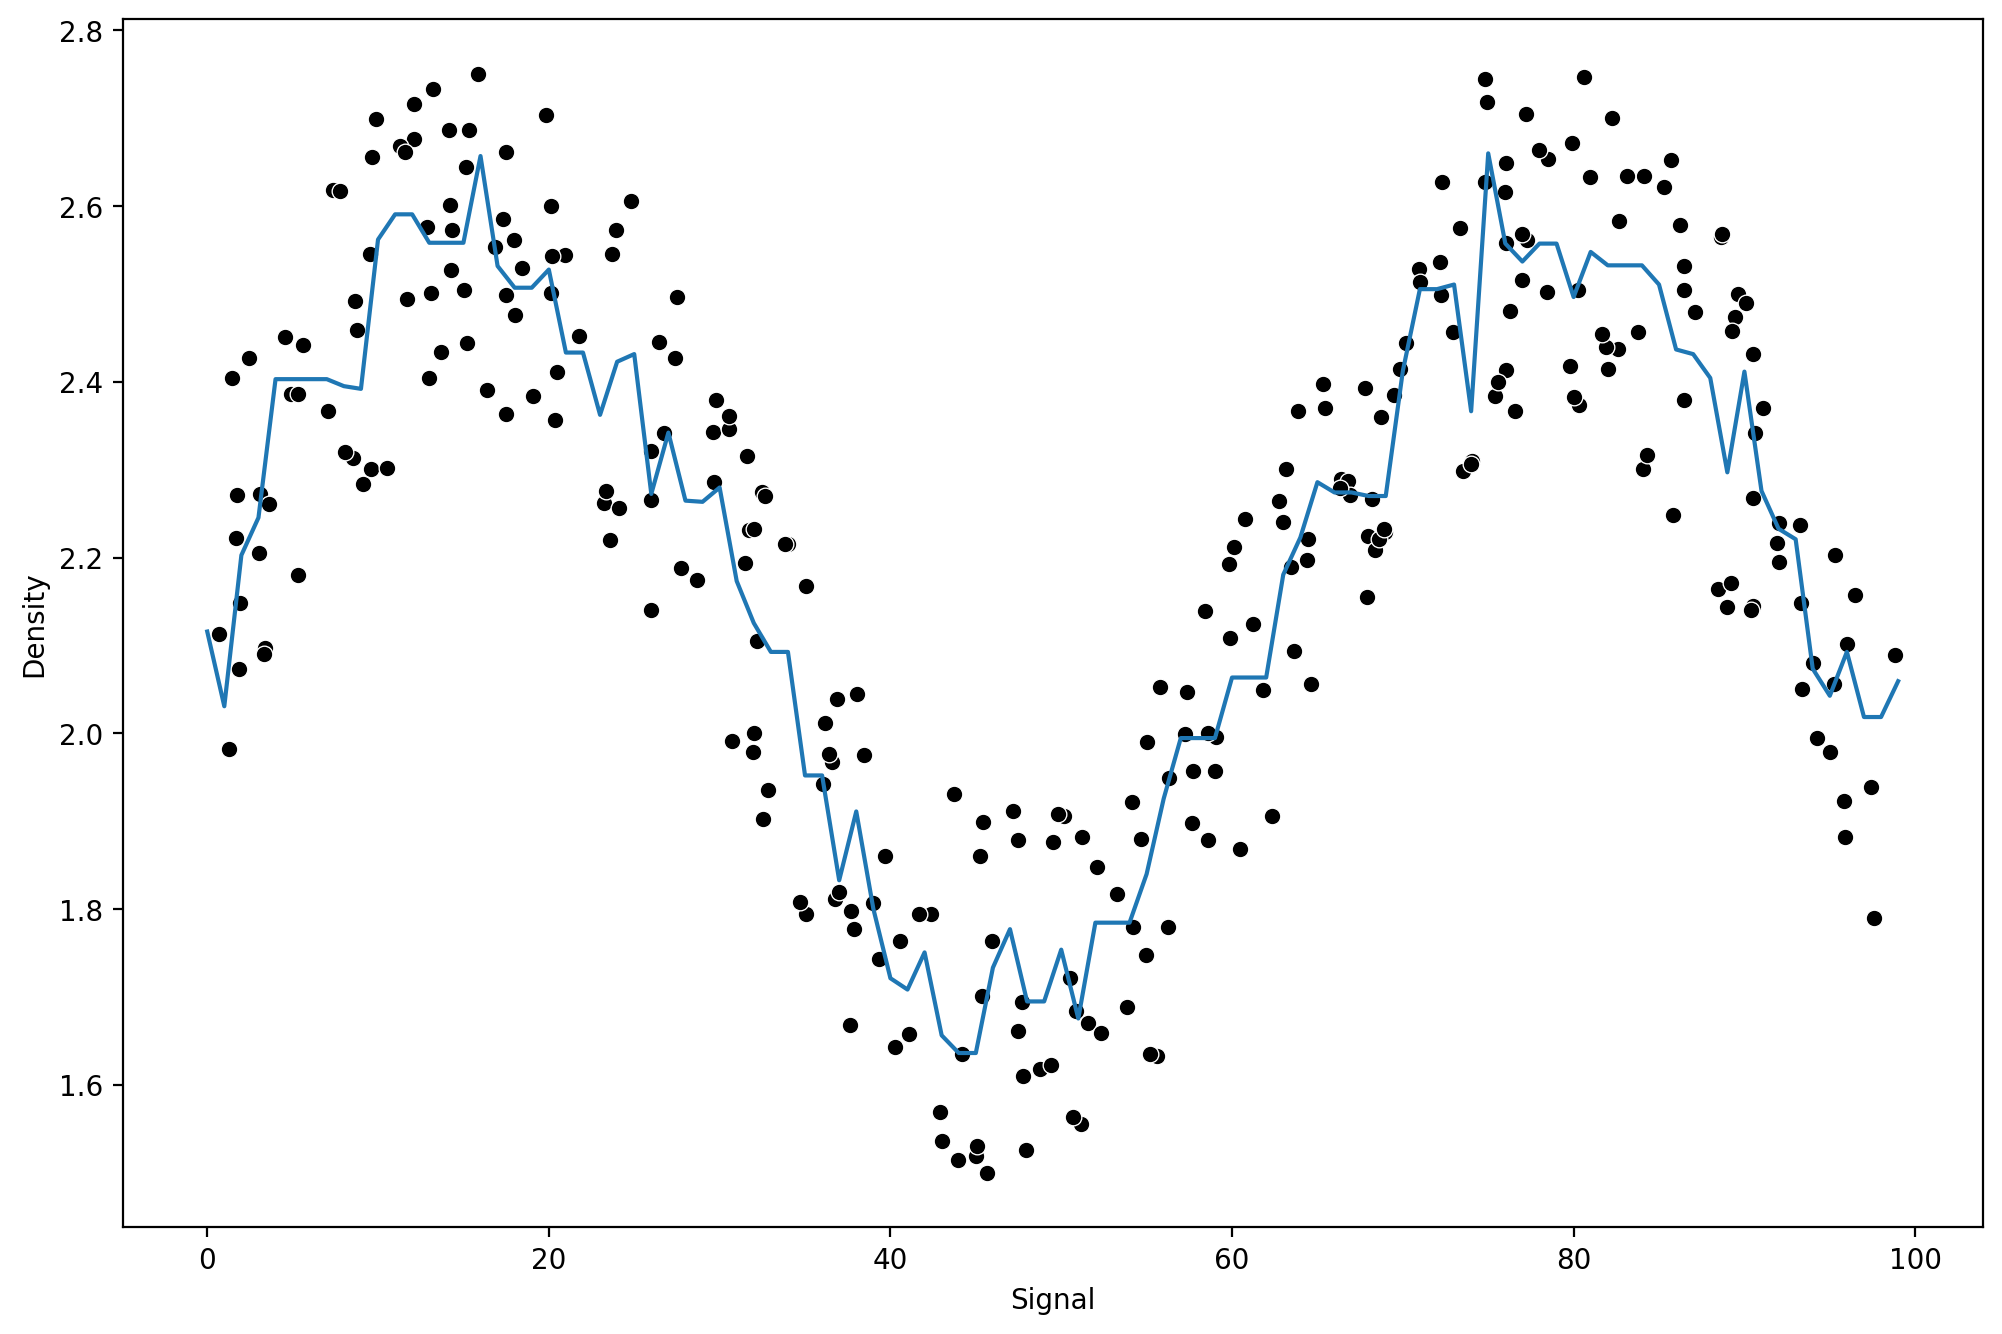

In [35]:
run_model(model, X_train, y_train, X_test, y_test)

In [36]:
model = AdaBoostRegressor()

RMSE: 0.13480114096925655
MAE: 0.11603786749522833


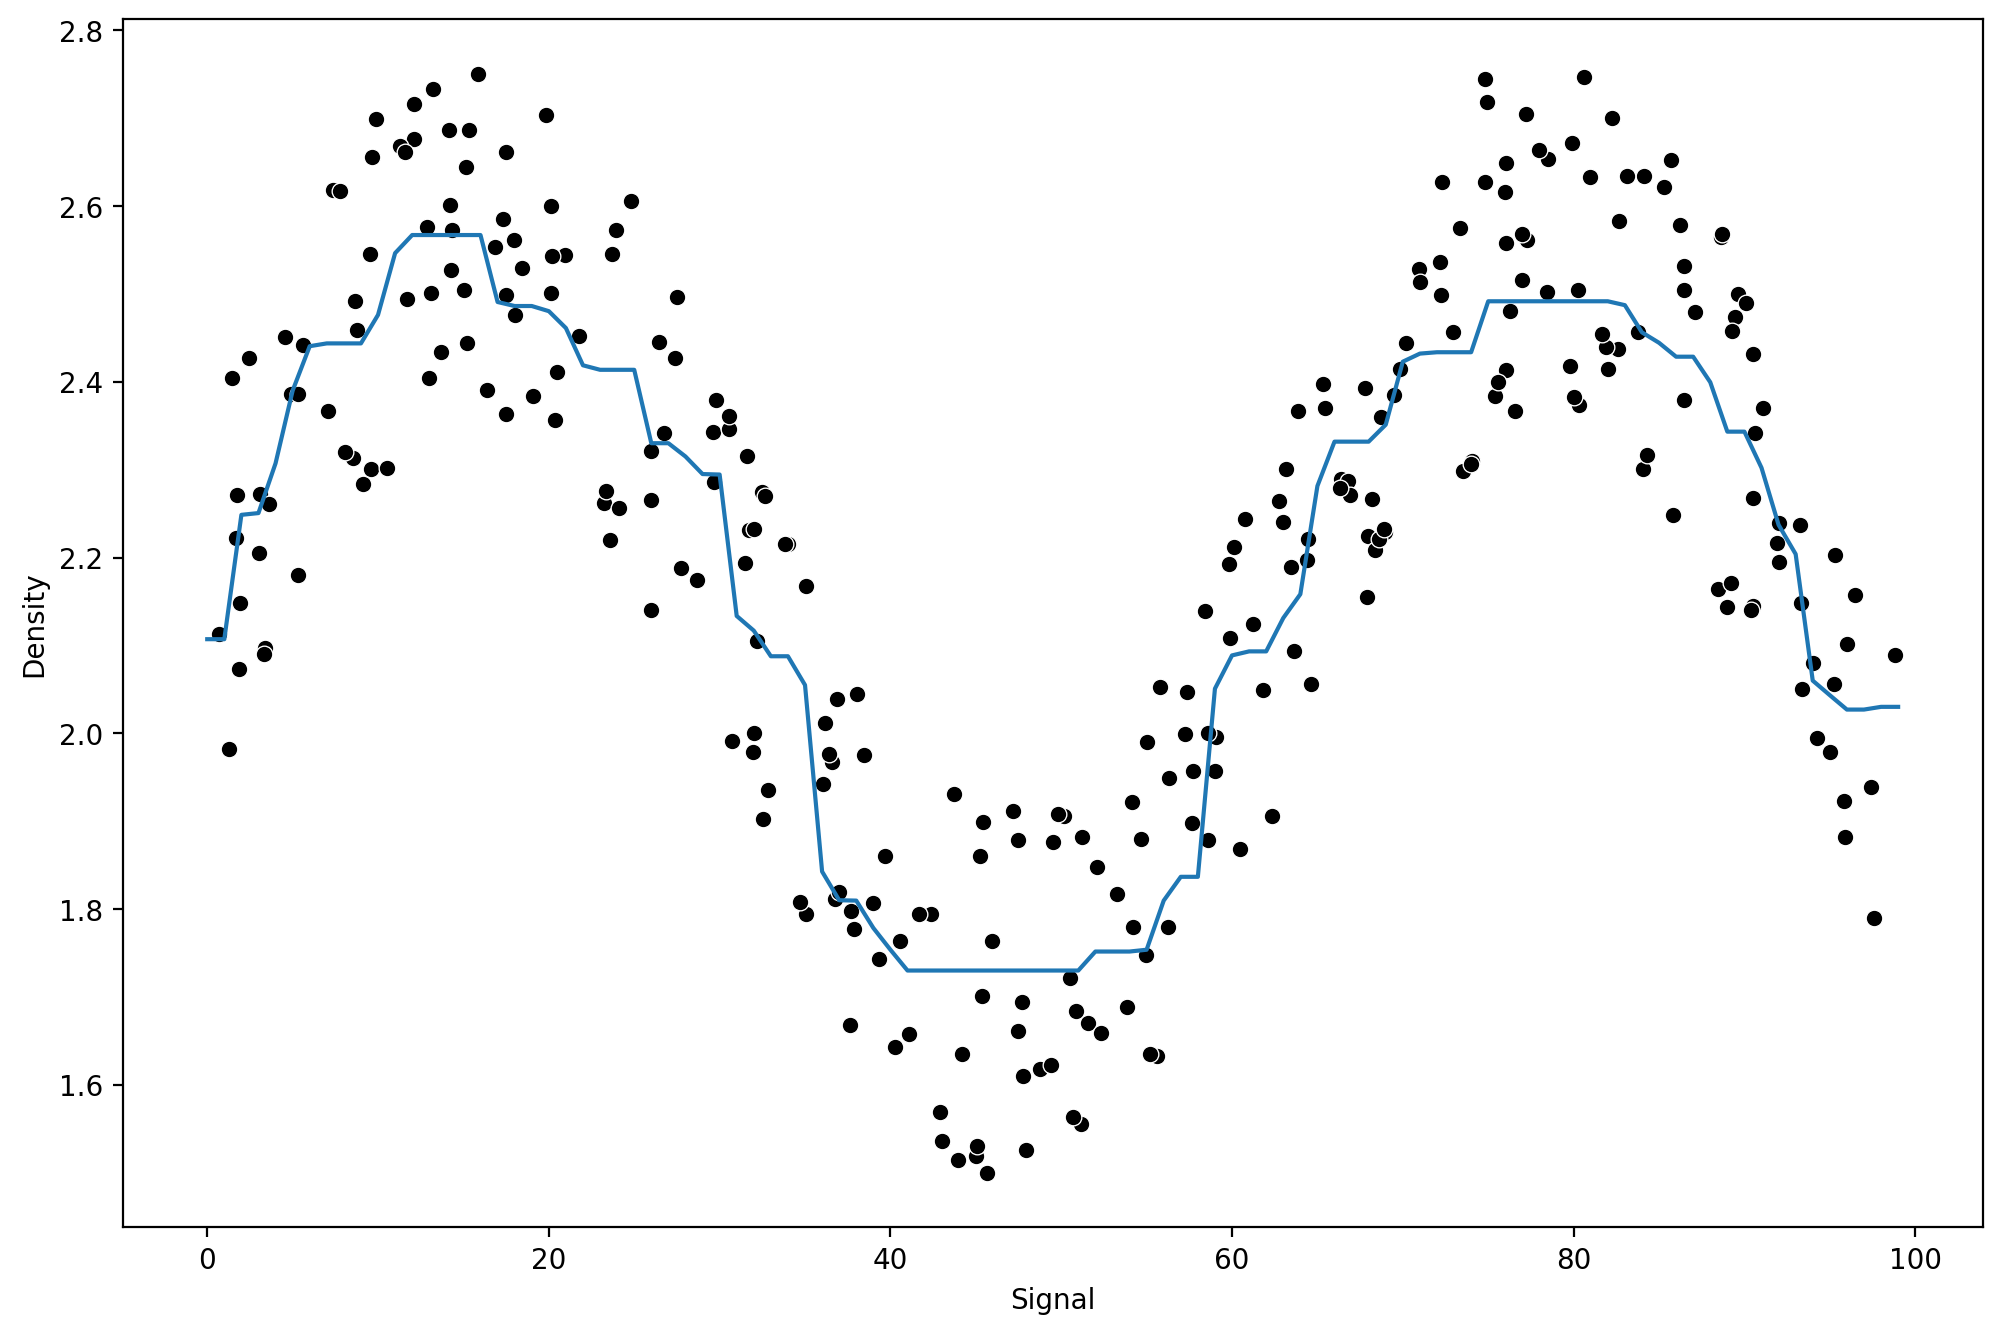

In [37]:
run_model(model, X_train, y_train, X_test, y_test)